## Problem 1. Plot $y = \sin x$ for $x$ from 0 to 720 degrees.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Y = [] # empty list to store y-values
X = [] # empty list to store x-values

for x in range(721):
    X.append(x)
    # X-list is appended
    Y.append(np.sin(np.deg2rad(x)))
    # Y-list is appended
    #"deg2rad" is used to convert the input angles to radian. Input angle is in degree, python default is radian.

Text(0.5, 1.0, 'sinewave')

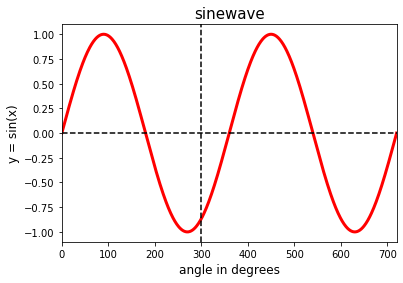

In [48]:
plt.plot(X, Y, color = 'red', linewidth = 3)
plt.axhline(linestyle = 'dashed', color = 'black') # inserts horizontal line
plt.axvline(x = 300, linestyle = 'dashed', color = 'black') # inserts verical line
plt.xlim(0,720)
plt.xlabel('angle in degrees', fontsize = 12)
plt.ylabel('y = sin(x)', fontsize = 12)
plt.title('sinewave', fontsize = 15)

## Problem 2. Radioactive decay of Uranium

Consider 1 gram of uranium at the beginning of formation of the Earth. Obtain a plot of radioactive decay of <sup>238</sup>U and <sup>235</sup>U as a function of time, assuming their natural abundance of $99.275$% and $0.725$%, respectively. The half-lives of <sup>238</sup>U and <sup>235</sup>U are $4.468\times 10^9$ and $7.038\times 10^8$ years, respectively, and their molar masses are $238.05079$ and $235.04393$ gram, respectively. Take the current age of the Earth as $4.5 \times 10^9$ years. Display the results as a 4-plot panel figure, with two as regular and two as semi-log plots. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
class Radioactivity():
    
    def __init__(self, m, M, NA):
        self.m = m
        self.M = M
        self.NA = NA
        
    def nuclei_number(self):
        '''Uses mole concept to find the number of nuclei'''
        Nn = self.m*self.NA/self.M
        return Nn
    
    def remaining_nuclei(self, half_life, t):
        '''Finds the number of undecayed nuclei after time t'''
        N0 = self.nuclei_number()
        self.half_life = half_life
        self.t = t
        N = N0*np.exp(-0.693*self.t/self.half_life)
        return N

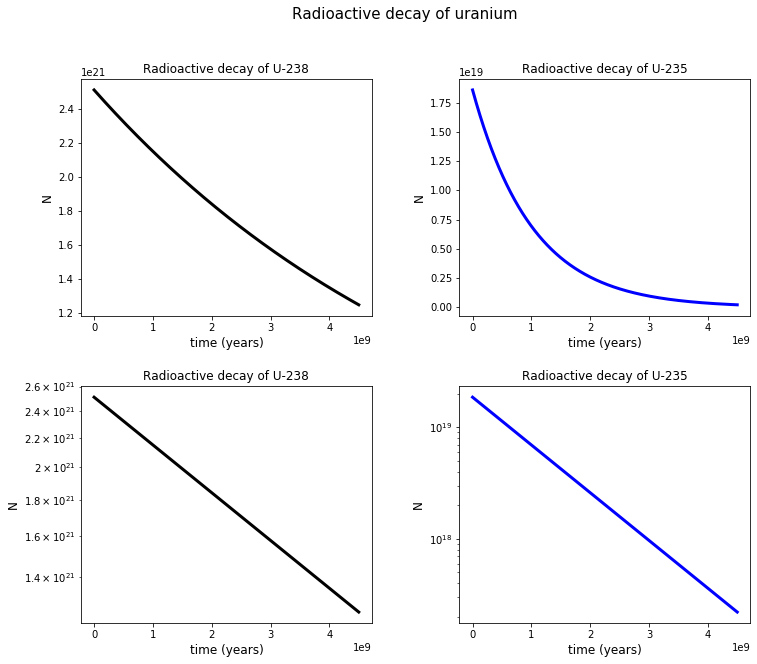

In [49]:
NA = 6.0221408E23 # Avogadro's number

m1 = 0.99275 # mass of U238 in gram in 1 gram of uranium
m2 = 1 - m1 # mass of U235 in gram in 1 gram of uranium

M1 = 238.05079 # molar mass of U238
M2 = 235.04393 # molar mass of U235

half_life1 = 4.468E9 # half life of U238
half_life2 = 7.038E8 # half life of U235

T = []
N1 = []
N2 = []

t = np.linspace(0, 4.5E9, 2000)

for i in t:
    T.append(i)
    U_238 = Radioactivity (m1, M1, NA)
    U_235 = Radioactivity (m2, M2, NA)
    
    N_U238 = U_238.remaining_nuclei(half_life1, i)
    N1.append(N_U238)
    
    N_U235 = U_235.remaining_nuclei(half_life2, i)
    N2.append(N_U235)
    
plt.figure(figsize = [12,10])
plt.suptitle('Radioactive decay of uranium', fontsize = 15)

plt.subplot(2,2,1)
plt.plot(T, N1,'k-', linewidth = 3)
plt.xlabel('time (years)', fontsize = 12)
plt.ylabel('N', fontsize = 12)
plt.title('Radioactive decay of U-238')

plt.subplot(2,2,2)
plt.plot(T, N2,'b-',linewidth = 3)
plt.xlabel('time (years)', fontsize = 12)
plt.ylabel('N', fontsize = 12)
plt.title('Radioactive decay of U-235')

plt.subplot(2,2,3)
plt.semilogy(T, N1,'k-', linewidth = 3)
plt.xlabel('time (years)', fontsize = 12)
plt.ylabel('N', fontsize = 12)
plt.title('Radioactive decay of U-238')

plt.subplot(2,2,4)
plt.semilogy(T, N2,'b-', linewidth = 3)
plt.xlabel('time (years)', fontsize = 12)
plt.ylabel('N', fontsize = 12)
plt.title('Radioactive decay of U-235')


plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

## Problem 3. Program to find square root.

<p style = "color: blue"><b>(Question taken from John Zelle, Python Programming, Third Edition, Franklin, Beedle and Associates)</b></p>

In this exercise, you are to write your own algorithm for computing square roots. One way to solve this problem is to use a guess-and-check approach. You first guess what the square root might be, and then see how close your guess is. You can use this information to make another guess and continue guessing until you have found the square root (or a close approximation to it). One particularly good way of making guesses is to use Newton's method. Suppose x is the number we want the root of, and guess is the current guessed answer. The guess can be improved by computing the next guess as:
<p>
</p>

<center>$\dfrac{guess+\dfrac{x}{guess}}{2}$</center>

Write a program that implements Newton's method. The program should prompt the user for the value to find the square root of (x) and the number of times to improve the guess. Starting with a guess values of x/2, your program should loop the specified number of times applying Newton's method and report the final value of guess. You should also subtract your estimate from the value of <code>math.sqrt(x)</code> to show how close it is.

In [22]:
import math

In [50]:
x = float(input('What number do you want to find the square root of?'))
# float converts the input string to a floating point value.

n = int(input('How many iterations do you want?'))
# int converts the input string to an integer.

guess = x/2

i = 0

while i < n:
    guess = 0.5*(guess + x/guess)
    i = i + 1 # i += 1

    
print('Estimated square root =' , guess)

error = abs(math.sqrt(x) - guess)
print('Error = ', error)

What number do you want to find the square root of?11.31269711311
How many iterations do you want?5
Estimated square root = 3.3634353142449465
Error =  4.440892098500626e-16


## Problem 4. The semi-empirical mass formula

<p style = "color: blue"><b>(Question taken from Mark Newman, Computational Physics, First Edition)</b></p>

In nuclear physics, the semi-empirical mass formula is a formula for calculating the approximate nuclear binding energy *B* of an atomic nucleus with atomic number *Z* and mass number *A*:
$B=a_1A-a_2A^{2/3}-a_3\dfrac{Z^2}{A^{1/3}}-a_4\dfrac{(A-2Z)^2}{A}+\dfrac{a_5}{A^{1/2}}$, where in units of milions of electron volts, the constants are $a_1=15.8$, $a_2=18.3$, $a_3=0.714$, $a_4=23.2$, and 

$a_5 = \begin{cases}
    0       & \quad \text{if } A \text{ is odd}\\
    12.0  & \quad \text{if } A \text { and}\ Z \text{ are both even}\\
    -12.0 & \quad \text{if } A \text { is even and}\ Z \text{ is odd}
  \end{cases}$

a) Write a program that takes as its input the values of *A* and *Z*, and prints out the binding energy for the corresponding atom. Use your program to find the binding energy of an atom with *A* = 58 and *Z* = 28. (Hint: The correct answer is around 490 MeV.)

b) Modify your program to print out not the total biding energy *B*, but the binding energy per nucleon, which is *B*/*A*.

c) Now modify your program so that it takes as input just a single value of the atomic number *Z* and then goes through all values of *A* from *A* = *Z* to *A* = 3*Z*, to find the one that has the largest binding energy per nucleon. This is the most stable nucleus with the given atomic number. Have your program print out the value of *A* for this most stable nucleus and the value of binding energy per nucleon.

d) Modify your program again so that, instead of taking *Z* as input, it runs through all values of *Z* from 1 to 100 and prints out the most stable value of *A* for each one. At what value of *Z* does the maximum binding energy per nucleon occur? (The true answer, in real life, is *Z*=28, which is nickel. You should find that semi-empirical mass formula gets the answer roughly right but not exactly.

#### Solution to (a) and (b)

In [25]:
Z = int(input('What is the atomic number?'))
A = int(input('What is the mass number?'))

a1 = 15.8
a2 = 18.3
a3 = 0.714
a4 = 23.2


if (A%2) != 0:
    # if the remainder of A/2 is not zero,i.e., if A is odd.
    a5 = 0
elif ((A+Z)%2) == 0:
    # else if remainder of (A+Z)/2 is zero, i.e., A+Z is even. Since A is even, Z must be even.
    # So this holds for both A and Z even.
    a5 = 12.0
else:
    a5 = -12.0
    
B = a1*A - a2*A**(2/3) - a3*Z**2/(A**(1/3)) - a4*(A - 2*Z)**2/A + a5/A**(1/2)

print('The binding energy is', B, 'MeV.')

print('The BE per nucleon is', B/A, 'MeV.')

What is the atomic number?28
What is the mass number?58
The binding energy is 497.5620206224374 MeV.
The BE per nucleon is 8.578655527973059 MeV.


#### Solution to (c)

In [31]:
Z = int(input('What is the atomic number?'))
A = [a for a in range(Z, 3*Z + 1)] # can also be written as A = np.arange(Z. 3*Z + 1)

a1 = 15.8
a2 = 18.3
a3 = 0.714
a4 = 23.2

BE_per_nucleon = []

for i in (A):

    if (i%2) != 0:
        a5 = 0
    elif ((i+Z)%2) == 0:
        a5 = 12.0
    else:
        a5 = -12.0
    
    B = a1*i - a2*i**(2/3) - a3*Z**2/(i**(1/3)) - a4*(i - 2*Z)**2/i + a5/i**(1/2)
    
    BE_per_nucleon.append(B/i)
    
print('A = ', A, 'BE per nucleon = '  , BE_per_nucleon)
    
print('maximum BE per nucleon = ', max(BE_per_nucleon), 'MeV.')
    
print('Corresponding A = ', Z + BE_per_nucleon.index(max(BE_per_nucleon)))    

What is the atomic number?3
A =  [3, 4, 5, 6, 7, 8, 9] BE per nucleon =  [-21.57369117027567, -4.0403091898661465, 3.418505558710674, 4.323231296015974, 5.280168164356119, 4.268044914110091, 4.081244445613872]
maximum BE per nucleon =  5.280168164356119 MeV.
Corresponding A =  7


#### Solution to (d)

In [37]:
a1 = 15.8
a2 = 18.3
a3 = 0.714
a4 = 23.2

Z = [z for z in range(1, 5)]

for z in Z:
    A = [a for a in range(z, 3*z + 1)]


    BE_per_nucleon = []

    for i in (A):

        if (i%2) != 0:
            a5 = 0
        elif ((i+z)%2) == 0:
            a5 = 12.0
        else:
            a5 = -12.0
    
        B = a1*i - a2*i**(2/3) - a3*z**2/(i**(1/3)) - a4*(i - 2*z)**2/i + a5/i**(1/2)
    
        BE_per_nucleon.append(B/i)
    
   
    print('maximum BE per nucleon = ', max(BE_per_nucleon), 'MeV.')
    print('Corresponding Z = ', z, 'Corresponding A = ', z + BE_per_nucleon.index(max(BE_per_nucleon)))

maximum BE per nucleon =  0.36869091831015793 MeV.
Corresponding Z =  1 Corresponding A =  3
maximum BE per nucleon =  5.321930578649441 MeV.
Corresponding Z =  2 Corresponding A =  4
maximum BE per nucleon =  5.280168164356119 MeV.
Corresponding Z =  3 Corresponding A =  7
maximum BE per nucleon =  6.466330085889912 MeV.
Corresponding Z =  4 Corresponding A =  8
